Time series analysis in deep learning involves using neural networks and other deep learning techniques to analyze and make predictions based on time-ordered data. Time series data consists of observations or measurements recorded at regular intervals over time, such as stock prices, weather data, or sensor readings.

Deep learning models can be applied to various time series analysis tasks, including:

**Time Series Forecasting**: Predicting future values of a time series based on past observations. This can be useful in various applications such as sales forecasting, demand prediction, and financial market analysis.

**Anomaly Detection**: Identifying unusual patterns or outliers in time series data that deviate from normal behavior. Anomalies could indicate potential issues or interesting events that require further investigation.

**Classification**: Categorizing time series data into different classes or categories based on patterns or features extracted from the data. For example, classifying human activities based on accelerometer data or classifying EEG signals into different brain states.

**Generative Modeling**: Generating new samples of time series data that resemble the patterns observed in the training data. This can be useful for data augmentation or generating synthetic data for training other models.

**SARIMAX** (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) is a popular time series forecasting algorithm that extends the **ARIMA** model to account for seasonality and exogenous variables. It is commonly used for modeling and forecasting time series data that exhibit seasonal patterns and can incorporate additional variables that may influence the time series. SARIMAX models are useful for various forecasting tasks, including sales forecasting, inventory management, and economic forecasting. They can capture complex temporal dependencies and provide interpretable results that help understand the underlying dynamics of the time series data.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df= pd.read_csv("oil price.csv")
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,05-Feb-24,72.75,73.28,71.41,72.78,72.78,"350,843"
1,29-Jan-24,78.90,79.29,71.79,72.28,72.28,"2,069,364"
2,22-Jan-24,73.41,78.26,72.89,78.01,78.01,"1,687,703"
3,15-Jan-24,72.63,74.91,70.50,73.41,73.41,"1,314,632"
4,08-Jan-24,73.51,75.25,70.13,72.68,72.68,"1,885,747"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1206 non-null   object 
 1   Open         1206 non-null   float64
 2   High         1206 non-null   float64
 3   Low          1206 non-null   float64
 4   Close*       1206 non-null   float64
 5   Adj Close**  1206 non-null   float64
 6   Volume       1206 non-null   object 
dtypes: float64(5), object(2)
memory usage: 66.1+ KB


In [15]:
# for drowing plot , first step we should change date(object) format----> time/date format
df["Date"] = df["Date"].apply(pd.to_datetime)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1206 non-null   datetime64[ns]
 1   Open         1206 non-null   float64       
 2   High         1206 non-null   float64       
 3   Low          1206 non-null   float64       
 4   Close*       1206 non-null   float64       
 5   Adj Close**  1206 non-null   float64       
 6   Volume       1206 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 66.1+ KB


In [6]:
# next step set date as index
df.set_index("Date" , inplace=True)

In [8]:
df["Open"].head()

Date
2024-02-05    72.75
2024-01-29    78.90
2024-01-22    73.41
2024-01-15    72.63
2024-01-08    73.51
Name: Open, dtype: float64

<Axes: xlabel='Date'>

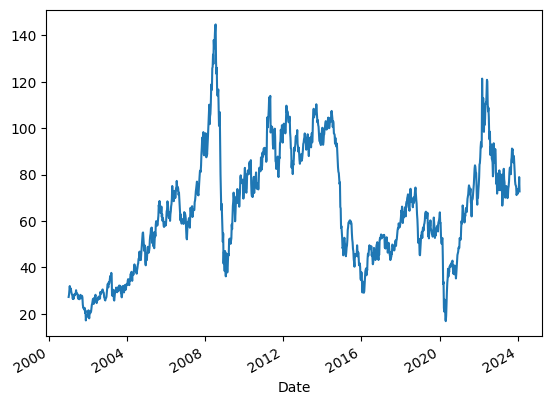

In [7]:
df["Open"].plot()

when we put date as index  , Date ---> index so you can not see as feature
so for next cell you have to reset run_time before adding date as index to have  "Date" as feature and after df["date"] you didnt get error.

In [17]:
# Check the column names
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')


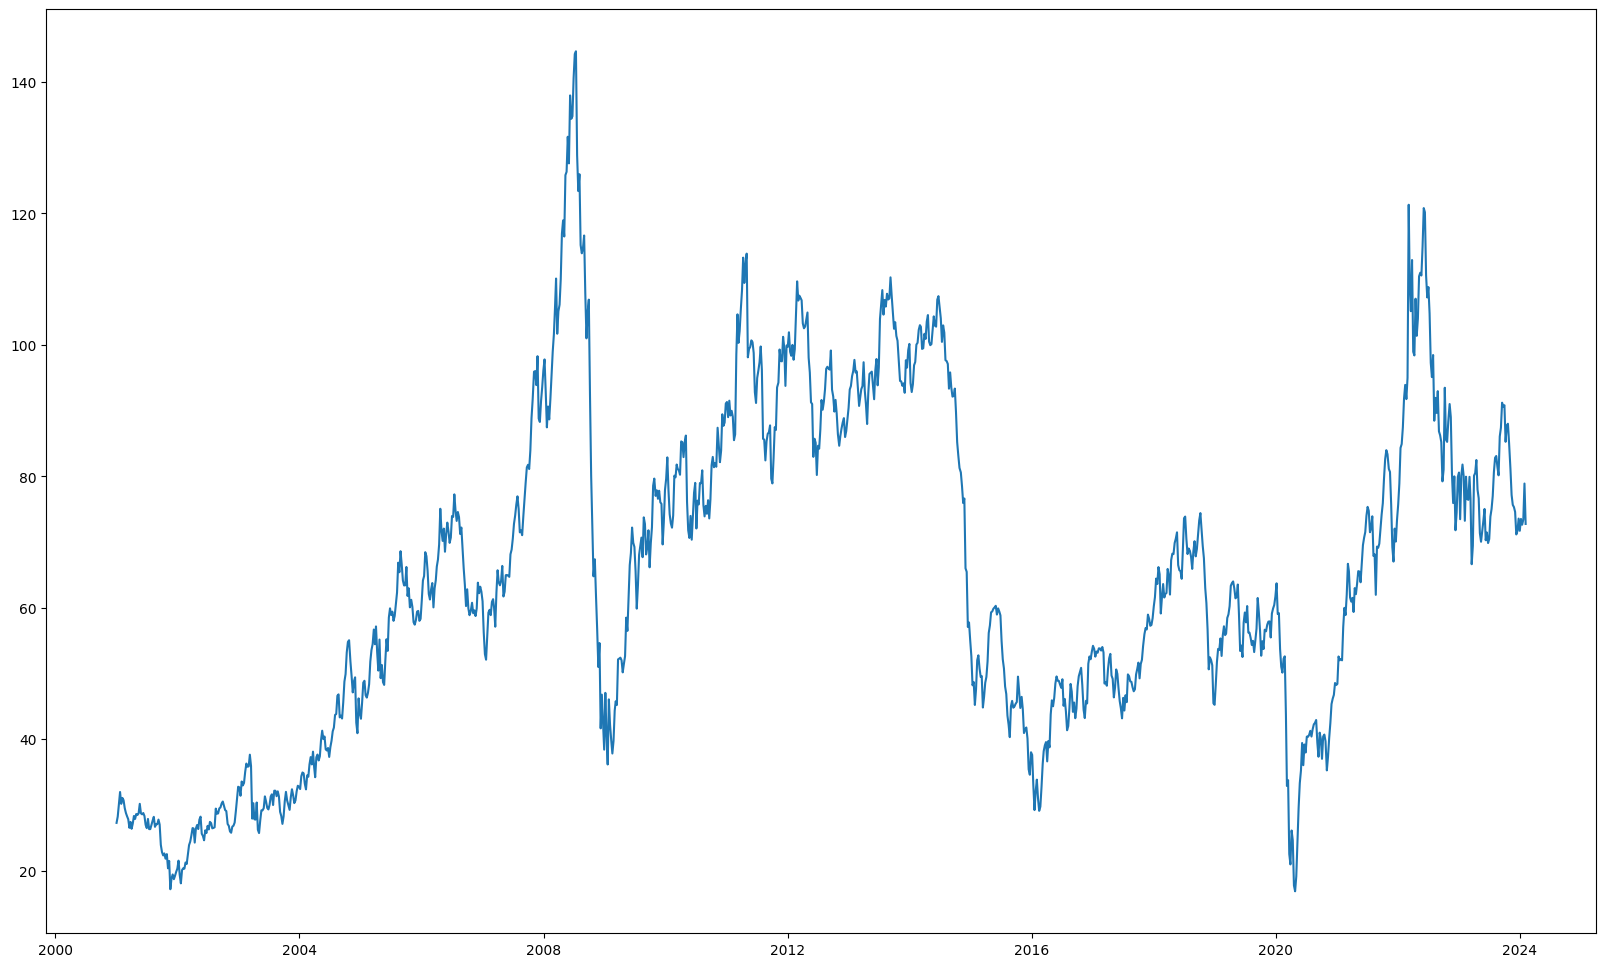

In [18]:
plt.figure(figsize=(20, 12))
plt.plot(df["Date"] , df["Open"])
plt.show()

In the context of time series analysis, a **stationary time series ** is one whose statistical properties such as **mean, variance, and autocorrelation remain constant over time**. This means that the data does not exhibit trends or seasonality, and the statistical properties do not change with time.

Formally, a time series  is said to be stationary if it satisfies the following conditions:

Constant mean: The mean of the series remains constant over time.
Constant variance: The variance of the series remains constant over time.
Constant autocovariance: The autocovariance.

Stationarity is important in time series analysis because **many forecasting methods assume that the underlying data is stationary.** Non-stationary data can lead to unreliable forecasts and incorrect conclusions. Therefore, it is often necessary to transform or preprocess non-stationary data to make it stationary before applying forecasting models.

In summary, **stationary data refers to time series data that exhibits constant statistical properties over time, including mean, variance, and autocorrelation**.

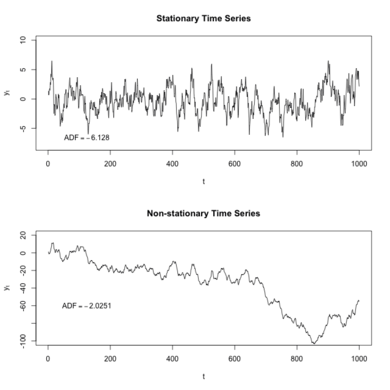

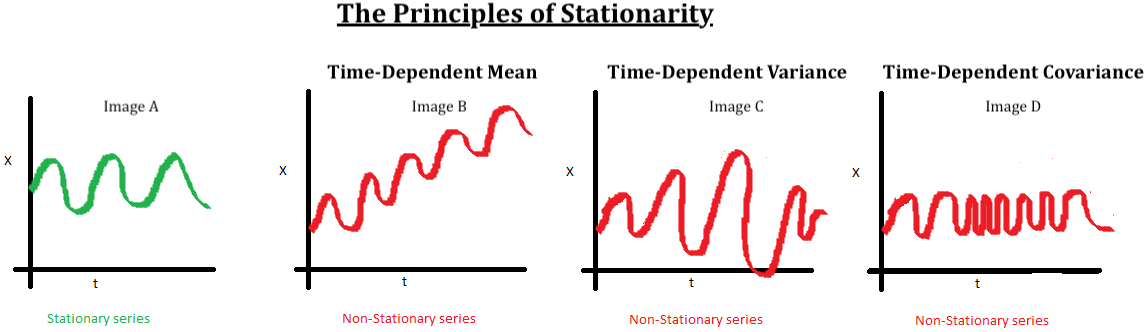

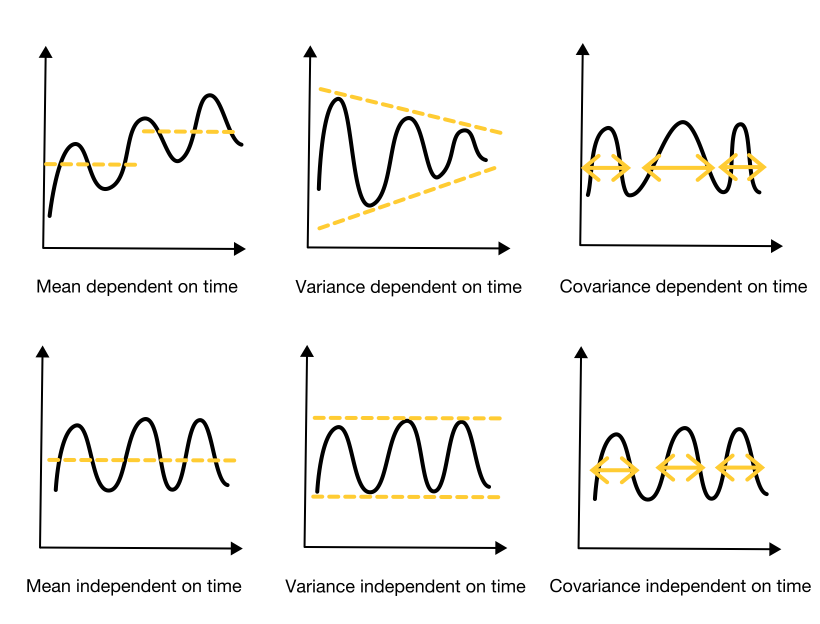

When a time series is stationary, it means that certain attributes of the data do not change over time. However, some time series are non-stationary, whereby values and associations between and among variables do vary with time. In finance, many processes are non-stationary, and so must be handled appropriate.

most of time_series **algorithum work** with **stationary data**.


how detect stationary and not stationary:

1- watching the graph of data ---> more simple and accurate method

2- **augmented Dickey-Fuller test: ADF test** is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. It is one of the most commonly used **statistical test** when it comes to analyzing the stationary of a series.


- Adfuller work with **p_value so should be less than 5 percent** .



In [19]:
from statsmodels.tsa.stattools import adfuller
adfuller(df["Open"])

# 0.12202939397110063 = p_value -----> should be less than 5 percent for stationary data
# here we have not-stationary becouse (0.12 > 0.05)

(-2.473604623007886,
 0.12202939397110063,
 22,
 1183,
 {'1%': -3.4358897684764886,
  '5%': -2.8639862448409055,
  '10%': -2.5680724298154542},
 6123.707019264774)

# data cleaning ( make staionary data) in Time Series.

- the first method to **change non_stationary** data to ----> stationary data  is using  **Logarithm**.

- the second methhod is **calculates the difference of** a DataFrame element compared with another element diff in pandas, The **diff() method** returns a DataFrame with the difference between the values for each row and, by default, the previous row.


In [20]:
# step 1 ----> LOG
df["Open"] = np.log(df["Open"])
adfuller(df["Open"])

(-1.9371230173331464,
 0.3148037564086622,
 11,
 1194,
 {'1%': -3.4358386217286885,
  '5%': -2.8639636801920956,
  '10%': -2.5680604125597277},
 -3557.5050227702577)

In [24]:
# step 2 ---> diff()
df["Open"] = df["Open"].diff()



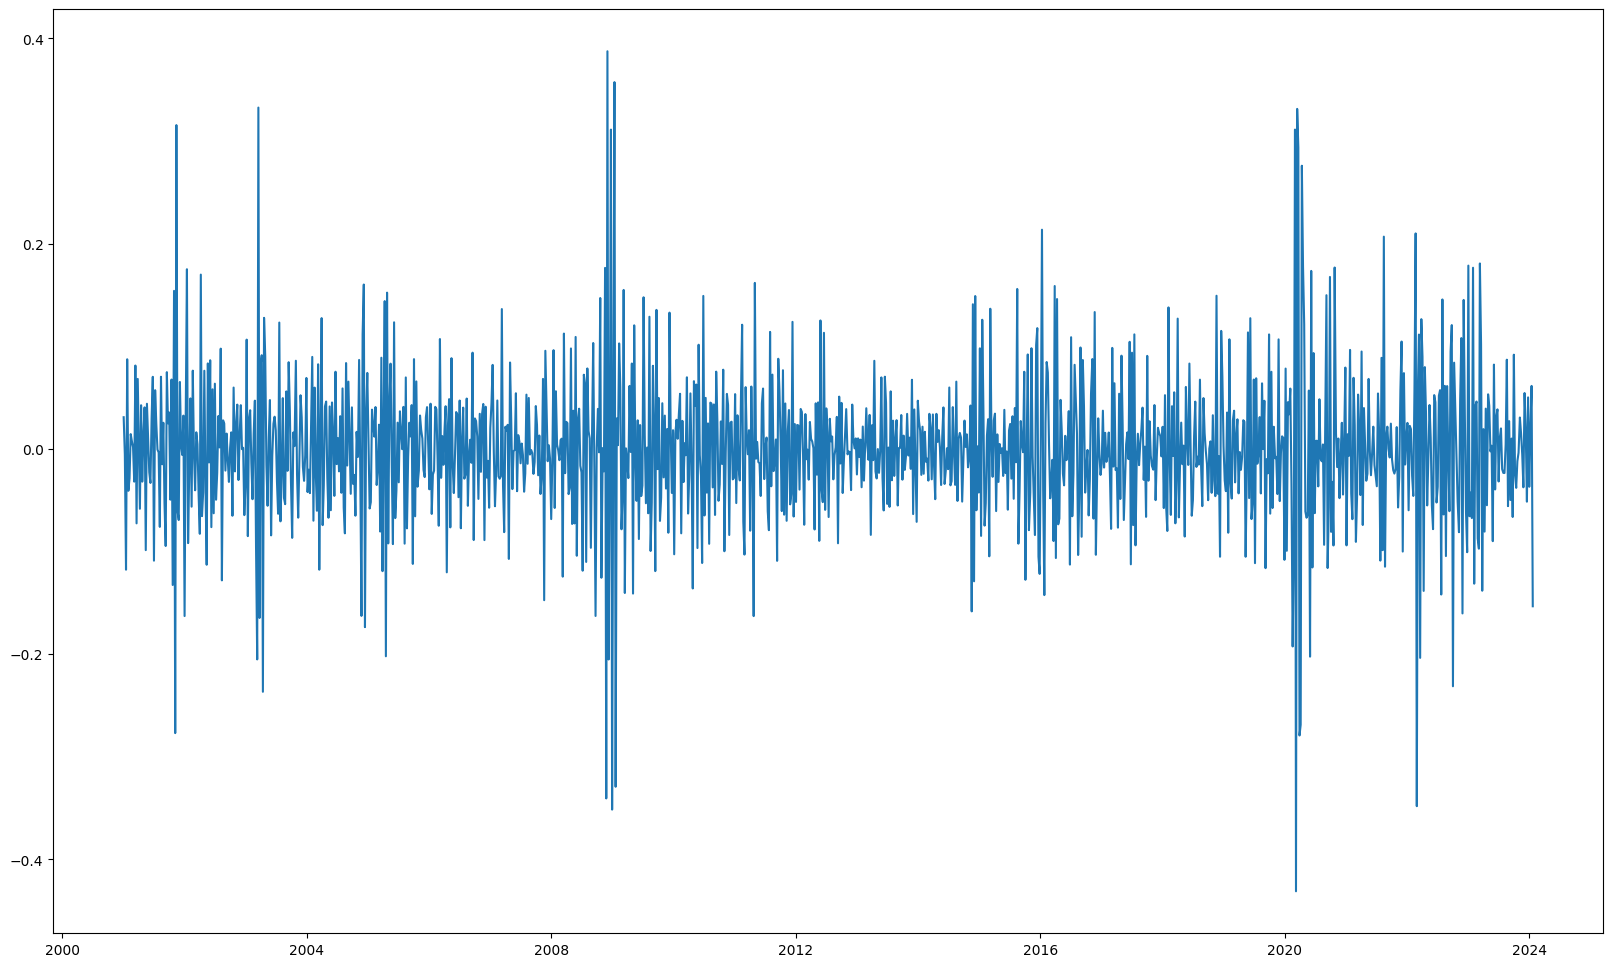

In [25]:
plt.figure(figsize=(20, 12))
plt.plot(df["Date"] , df["Open"])
plt.show()

when use **Diff()** is diffrent value between 2 index, so for **first index **diff() **return null value**.

and Adfuller give us error because of this non_value so we have to **remove first index to calculate Adfuller** after using Log and Diff() steps.

In [27]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Drop rows with missing values
df.dropna(inplace=True)

# Drop rows with infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Perform the Augmented Dickey-Fuller test
adfuller_result = adfuller(df["Open"])


In [28]:
adfuller_result


# 2.3e-5 ----> 0.000023

# 1.1238553568416582e-24 ---> almost zero ---> our data now is stationary

(-13.195036548827018,
 1.1238553568416582e-24,
 21,
 1182,
 {'1%': -3.4358944654892474,
  '5%': -2.86398831702468,
  '10%': -2.5680735334014733},
 -3488.6864010843037)

 In the **SARIMAX** (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) algorithm, the parameters **AR, I, MA, and S** refer to the components used to model the time series data.

- AR (AutoRegressive) ---> n_gram:

AR is the autoregressive term, which represents the correlation between the current observation and its previous observations.
It captures the relationship between an observation and a number of lagged observations ( how past values influence the current value).
The AR parameter (p) represents the number of lag observations included in the model.

Range: Typically, the **AR parameter can range from** 0 to any positive integer. A common range might be from **0 to 10**, depending on the complexity of the time series.


- I (Integrated): ---> differntial number

I is the differencing term, which represents the number of times the data is differenced to achieve stationarity.
It is used to remove trends and make the data stationary.
The I parameter (d) represents the order of differencing.

Range: Typically, the I parameter is an integer greater than or equal to 0. A common range might be **from 0 to 2**.


- MA (Moving Average):


The MA parameter (q) This component models the error term as a linear combination of error terms at previous time points..


**MA almost is the same with AR** but **in AR we use pervious values** to **predict new values and in MA we using pervious noise  to predict new values**

in **AR we have p** as number of pervious values in **MA we have q** as pervious noises.

in AR  use regression algorithum in MA  we use linear combination of error.

q is the size of the **moving average window**.

Range: Typically, the **MA parameter can range** from 0 to any positive integer. A common range might be from **0 to 10**, similar to the AR parameter.


S (Seasonal Order):

S represents the seasonal component of the model, accounting for periodic fluctuations in the data.
It captures the seasonality pattern in the time series.
The S parameter (P, D, Q, and m) represents the seasonal autoregressive, differencing, moving average, and seasonal period, respectively.

Range: Each seasonal component (P, D, Q) can have a range similar to the non-seasonal components, while the seasonal period (m) is typically determined based on the seasonality of the data.

When using SARIMAX, you'll need to select appropriate values for these parameters based on the characteristics of your time series data and through techniques such as grid search or iterative model fitting.

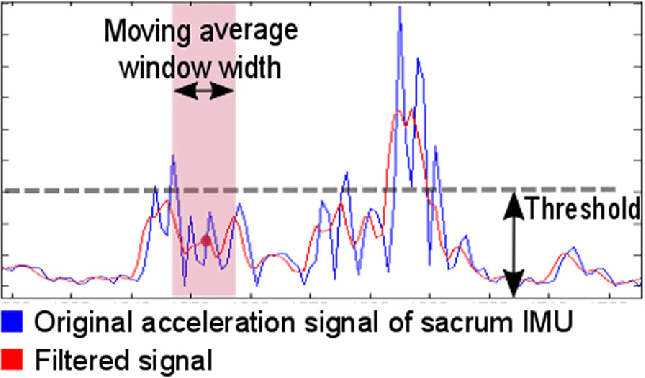

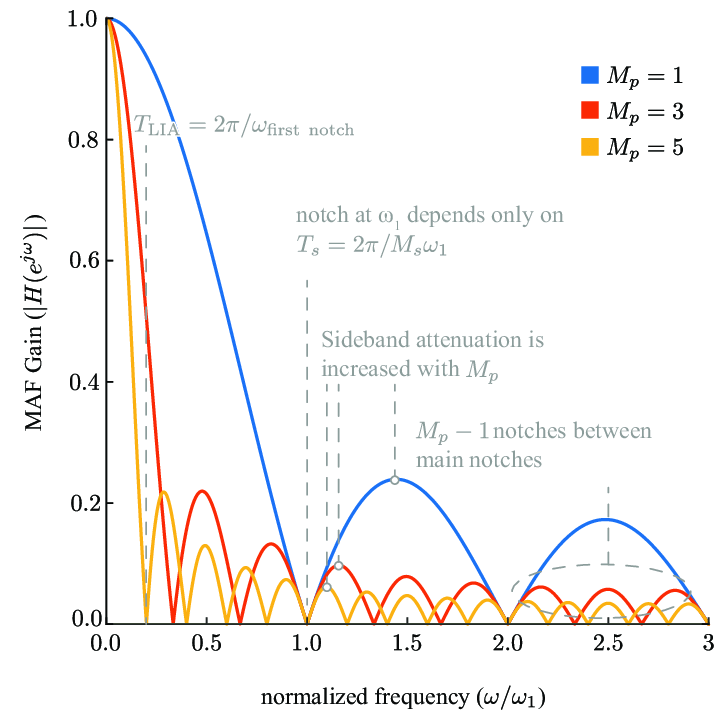

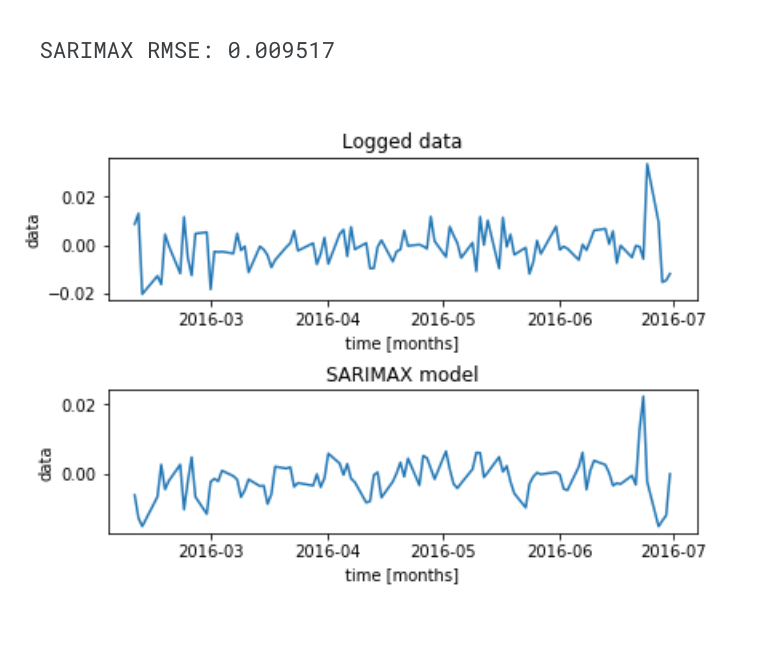

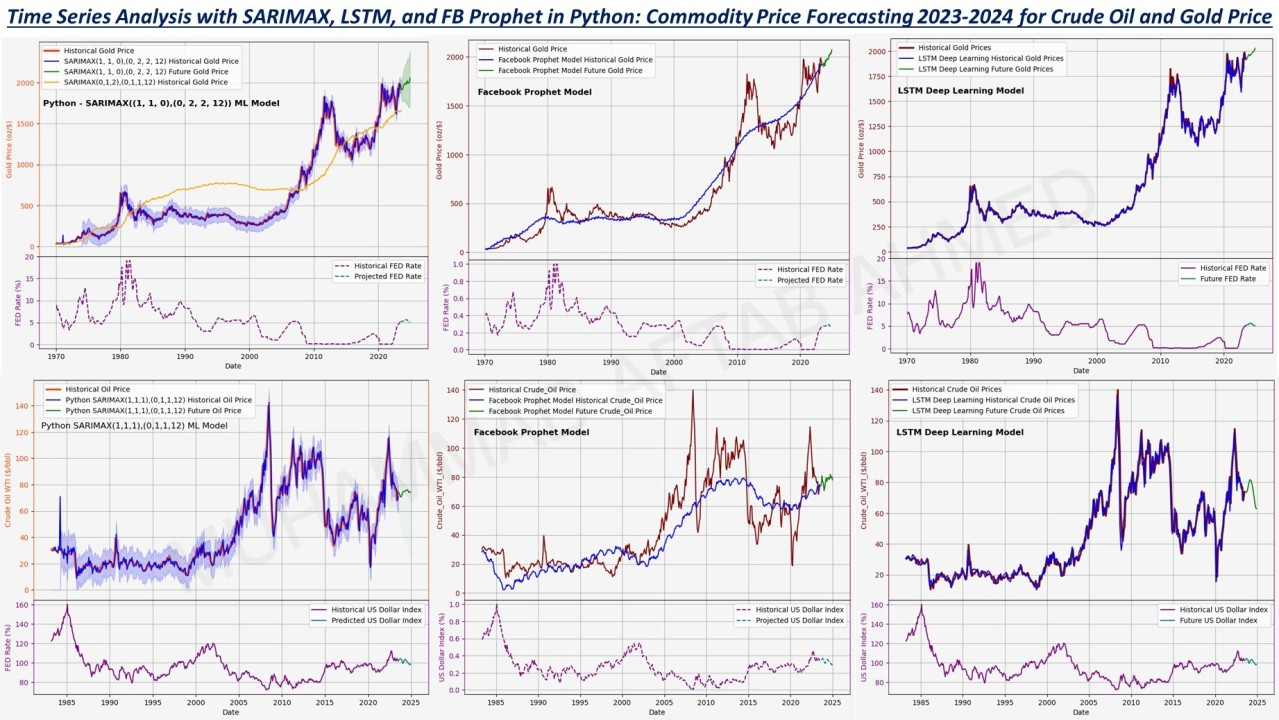

SARIMAX ----> S AR I MA
AR --->  for prediction new point , how many pervious point should be consider
the same as m_gram concept in text_mining (to predict new word how many pervious word should be consider) could be 3, 4,...10 ,.....

I ---->  is different number in diff() function , for different between two index bydefult it calculate with pervious one so I=1 , but we can change diff fuction give as different for example with 3 pervious, in this example assume we have this data : 1,2,2,4,9 ,.... and I=3 in the retrun result of diff() we has nul, nul, nul, 3(4_1), 7(9-2) ,... and you can 3 first 3 result is nul=Nane
because we didnt has any 3th pervious data to calculate defferent.

MA---> moving average

S ---> seasonal data






In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [30]:
model = SARIMAX(df["Open"] , order=(3,1,3) , seasonal_order=(2,1,2,4))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
response= model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                   Open   No. Observations:                 1204
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 4)   Log Likelihood                1683.431
Date:                                Sat, 10 Feb 2024   AIC                          -3344.861
Time:                                        05:29:47   BIC                          -3288.880
Sample:                                             0   HQIC                         -3323.773
                                               - 1204                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0415      0.077    -13.461      0.000      -1.193      -0.890
ar.L2         -0.1342      0.063     -2.118      0.034      -0.258      -0.010
ar.L3         -0.0350      0.045     -0.781      0.435      -0.123       0.053
ma.L1         -0.8079      0.073    -11.073      0.000      -0.951      -0.665
ma.L2         -0.9006      0.103     -8.722      0.000      -1.103      -0.698
ma.L3          0.7542      0.045     16.581      0.000       0.665       0.843
ar.S.L4       -0.7959      0.165     -4.821      0.000      -1.119      -0.472
ar.S.L8        0.0673      0.041      1.644      0.100      -0.013       0.147
ma.S.L4       -0.1065      0.165     -0.646      0.518      -0.430       0.217
ma.S.L8       -0.8852      0.166     -5.321      0.000      -1.211      -0.559
sigma2         0.0036      0.000     35.508      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):              1792.54
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**AIC stands for Akaike Information Criterion**, which is a measure used to evaluate the goodness of fit of a statistical model. In SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) modeling, the AIC is commonly used to compare different models and select the best one for a given dataset.

The AIC quantifies the trade-off between the goodness of fit of the model and the complexity of the model. It penalizes more complex models to prevent overfitting. The lower the AIC value, the better the model is considered to be.

The range of AIC values depends on the specific dataset and the complexity of the models being compared. **In general, lower AIC values indicate better models**. However, there is no predefined range for AIC that guarantees the best result. It's essential to compare AIC values across different models and select the one with the lowest AIC as the best model for the given dataset.

During the modeling process, **practitioners often perform a grid search** or use optimization techniques to find the model parameters that **minimize** the **AIC value** , indicating the best balance between model fit and complexity.

In [34]:
df["SARIMAX"] = response.fittedvalues
df.head()

# you can comapre the resulte of real value in df["Open"] with Sarimax prediction in df["SARIMAX"]

,Date,Open,High,Low,Close*,Adj Close**,Volume,SARIMAX
2,2024-01-22,-0.153273,78.26,72.89,78.01,78.01,"1,687,703",0.000000
3,2024-01-15,0.061439,74.91,70.50,73.41,73.41,"1,314,632",-0.153273
4,2024-01-08,0.022725,75.25,70.13,72.68,72.68,"1,885,747",0.061439
5,2024-01-01,-0.036835,74.24,69.28,73.81,73.81,"1,335,845",0.022725
6,2023-12-25,0.050262,76.18,71.25,71.65,71.65,"939,272",-0.113471
